In [15]:
# Libraries
using Random
using LinearAlgebra
using Plots
using ExponentialUtilities
using LaTeXStrings
using Printf

In [16]:
# Create data set
z_min, z_max = -2, 1

# number of samples
N = 5

# input values
z = range(z_min, z_max, length=N) .+ rand(N)

# output values
y = z.^2 + .5 * randn(N);

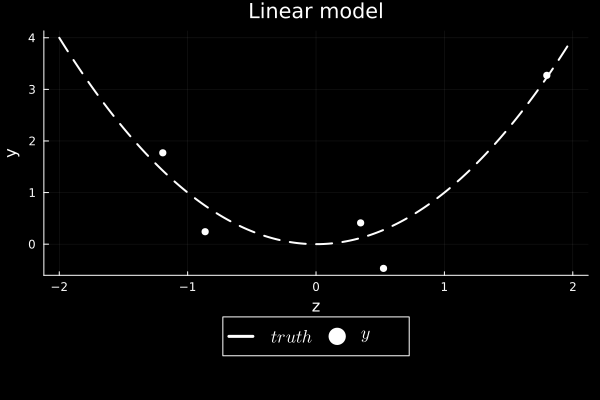

In [17]:
# Plotting the results

# array for creating analytical plot lines
N_grid = 1000
z_grid = range(z_min, z_max+1, length=N_grid)
y_grid = z_grid.^2

# plot
p1 = plot(xlabel="z", ylabel="y",
     title="Linear model",grid=true,
     background_color="#000000")
plot!(p1, z_grid, y_grid, linecolor=:white, linestyle=:dash,
     linewidth=2, label=L"truth")
scatter!(p1, z, y, mc=:white, linestyle=:solid,
     linewidth=2, label=L"y")
plot!(p1, legend=:outerbottom, legendcolumns=2, legendfontcolor=:white,
     legendfontsize=12)

In [18]:
# Linear model with polynomial feature map and regularizer
function train_model_reg(z, y, q, lambda=0)
    N = length(z)

    # build a polynomial of order q
    Z = zeros(N, q);

    # data matrix
    for i in 1 : q
        Z[:, i] = z.^(i-1);
    end

    # pseudo inverse
    w = inv(Z' * Z + lambda * I) * Z' * y;

    return w
end;

# model evaluation
function h(z, w)
    N = length(z)
    q = length(w)
    
    y = zeros(N)
    for n in 1 : N
        for i in 1 : q
            y[n] += w[i] * z[n]^(i-1)
        end
    end
    return y
end;

# Loss function
function L(z, y, w)
    N = length(z)
    return 1/N * norm(h(z, w) - y, 2)
end;

[1.3055875300602793, -0.7915948845155754, -5.060743599049147, -1.02252549676912, 2.459256155424896]

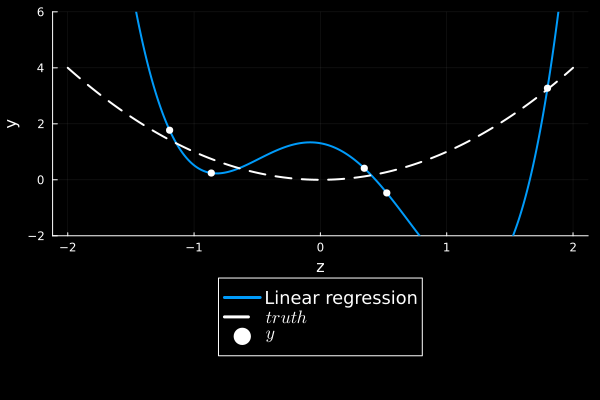

In [19]:
# unregularized solution
q = 5;
lambda_all = [0]

norm_w_all = zeros(length(lambda_all))

p1 = plot(xlabel="z", ylabel="y", ylims=(-2,6),
title="",grid=true,
background_color="#000000")

for i in 1 : length(lambda_all)
    w_lam = train_model_reg(z, y, q, lambda_all[i])
    y_lam = h(z_grid, w_lam);
    plot!(p1, z_grid, y_lam, linestyle=:solid,
    linewidth=2, label="Linear regression")
    norm_w_all[i] = norm(w_lam, 2)
    print(w_lam)
end

plot!(p1, z_grid, y_grid, linecolor=:white, linestyle=:dash,
    linewidth=2, label=L"truth")
scatter!(p1, z, y, mc=:white, linestyle=:solid,
    linewidth=2, label=L"y")
plot!(p1, legend=:outerbottom, 
    legendfontcolor=:white, legendfontsize=12)

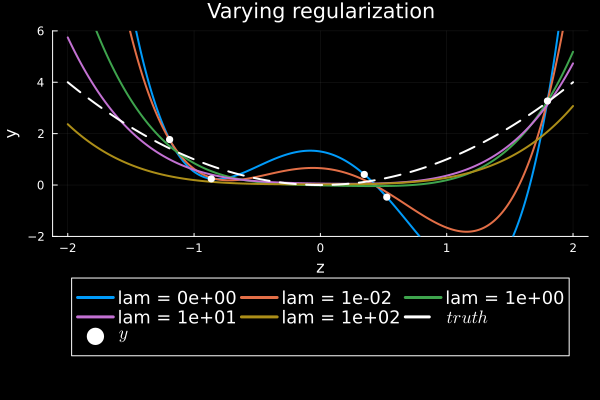

In [20]:
q = 5;
lambda_all = [0, 1e-2, 1, 10, 100]

norm_w_all = zeros(length(lambda_all))

p1 = plot(xlabel="z", ylabel="y", ylims=(-2,6),
title="Varying regularization",grid=true,
background_color="#000000")

for i in 1 : length(lambda_all)
    w_lam = train_model_reg(z, y, q, lambda_all[i])
    y_lam = h(z_grid, w_lam);
    plot!(p1, z_grid, y_lam, linestyle=:solid,
    linewidth=2, label=@sprintf("lam = %0.0e", lambda_all[i]))
    norm_w_all[i] = norm(w_lam, 2)
end

plot!(p1, z_grid, y_grid, linecolor=:white, linestyle=:dash,
    linewidth=2, label=L"truth")
scatter!(p1, z, y, mc=:white, linestyle=:solid,
    linewidth=2, label=L"y")
plot!(p1, legend=:outerbottom, legendcolumns=3, 
    legendfontcolor=:white, legendfontsize=12)

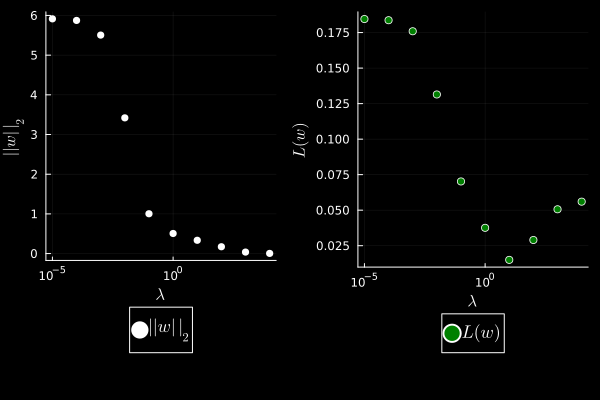

In [21]:
# Compare norm of weights

q = 5;
n_lam = 10;
norm_w_all = zeros(n_lam)
lambda_all = zeros(n_lam)
Loss_all = zeros(n_lam)
for i in 1 : n_lam
    lambda_all[i] = 10.0^(-6.0 + i)
    w_lam = train_model_reg(z, y, q, lambda_all[i])
    norm_w_all[i] = norm(w_lam, 2)
    Loss_all[i] =  L(z_grid, y_grid, w_lam)
end

p1 = plot(xlabel=L"\lambda", ylabel=L"||w||_2",
    title="",grid=true, xaxis=:log,
    background_color="#000000")
scatter!(p1, lambda_all, norm_w_all, mc=:white, label=L"||w||_2")
plot!(p1, legend=:outerbottom, 
    legendfontcolor=:white, legendfontsize=12)

p2 = plot(xlabel=L"\lambda", ylabel=L"L(w)",
    title="",grid=true, xaxis=:log,
    background_color="#000000")
scatter!(p2, lambda_all, Loss_all, mc=:green, label=L"L(w)")
plot!(p2, legend=:outerbottom, 
    legendfontcolor=:white, legendfontsize=12)

plot(p1, p2, layout=(1,2))